In [ ]:
# -*- coding: utf-8 -*-

In [ ]:
!python --version
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz
!tar xf spark-3.1.3-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.3-bin-hadoop3.2"

Python 3.8.16


In [ ]:
import pandas as pd
import numpy as np

import plotly as py
import matplotlib.gridspec as gridspec
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
import seaborn as sns

In [ ]:

import pandas as pd
dataCountries = pd.read_csv('/content/countries_gdp.csv')
dataCountries.head()

In [ ]:
dataCountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
dataCountries.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227,227,224,224,226.000000,209,223,225,225,225,205,224,223,212,211,212
unique,227,11,NaN,NaN,219,151,157,220,NaN,140,214,203,162,209,6,220,201,150,155,167
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,"66,6","0,00",0,"9,95",NaN,"99,0","269,5",0,0,100,2,"20,48","5,28","0,01","0,17","0,684"
freq,1,51,NaN,NaN,2,44,62,3,NaN,13,2,9,28,8,111,2,2,8,4,5
mean,NaN,NaN,2.874028e+07,5.982270e+05,NaN,NaN,NaN,NaN,9689.823009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178913e+08,1.790282e+06,NaN,NaN,NaN,NaN,10049.138513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.026000e+03,2.000000e+00,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.376240e+05,4.647500e+03,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.786994e+06,8.660000e+04,NaN,NaN,NaN,NaN,5550.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.749777e+07,4.418110e+05,NaN,NaN,NaN,NaN,15700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(dataCountries.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


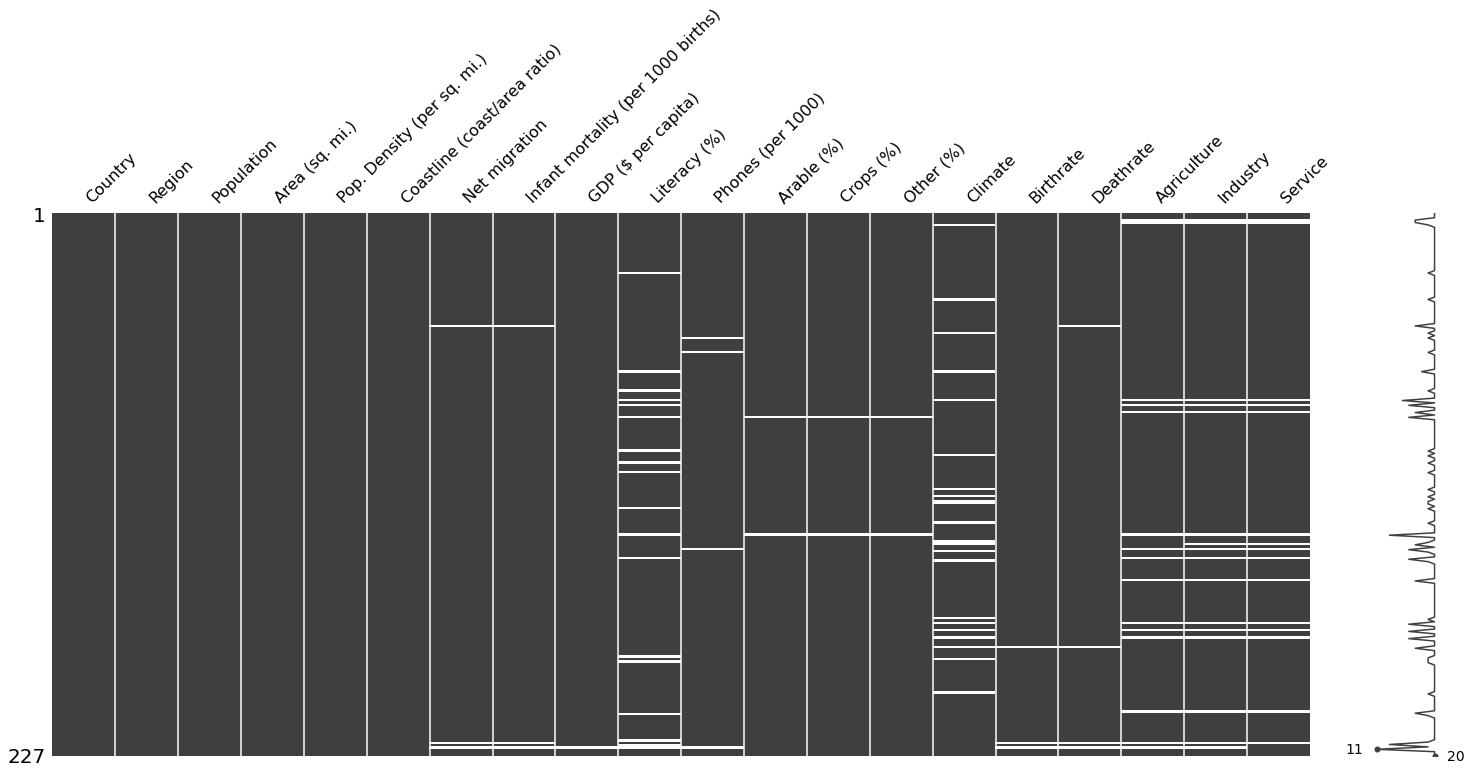

In [ ]:
#Visualize missing values
msno.matrix(dataCountries)
plt.show()

In [ ]:
dataCountries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
#Renaming Columns
dataCountries.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

In [ ]:
dataCountries.country = dataCountries.country.astype('category')
dataCountries.region = dataCountries.region.astype('category')

dataCountries.density = dataCountries.density.astype(str)
dataCountries.density = dataCountries.density.str.replace(",",".").astype(float)

dataCountries.coastline_area_ratio = dataCountries.coastline_area_ratio.astype(str)
dataCountries.coastline_area_ratio = dataCountries.coastline_area_ratio.str.replace(",",".").astype(float)

dataCountries.net_migration = dataCountries.net_migration.astype(str)
dataCountries.net_migration = dataCountries.net_migration.str.replace(",",".").astype(float)

dataCountries.infant_mortality = dataCountries.infant_mortality.astype(str)
dataCountries.infant_mortality = dataCountries.infant_mortality.str.replace(",",".").astype(float)

dataCountries.literacy = dataCountries.literacy.astype(str)
dataCountries.literacy = dataCountries.literacy.str.replace(",",".").astype(float)

dataCountries.phones = dataCountries.phones.astype(str)
dataCountries.phones = dataCountries.phones.str.replace(",",".").astype(float)

dataCountries.arable = dataCountries.arable.astype(str)
dataCountries.arable = dataCountries.arable.str.replace(",",".").astype(float)

dataCountries.crops = dataCountries.crops.astype(str)
dataCountries.crops = dataCountries.crops.str.replace(",",".").astype(float)

dataCountries.other = dataCountries.other.astype(str)
dataCountries.other = dataCountries.other.str.replace(",",".").astype(float)

dataCountries.climate = dataCountries.climate.astype(str)
dataCountries.climate = dataCountries.climate.str.replace(",",".").astype(float)

dataCountries.birthrate = dataCountries.birthrate.astype(str)
dataCountries.birthrate = dataCountries.birthrate.str.replace(",",".").astype(float)

dataCountries.deathrate = dataCountries.deathrate.astype(str)
dataCountries.deathrate = dataCountries.deathrate.str.replace(",",".").astype(float)

dataCountries.agriculture = dataCountries.agriculture.astype(str)
dataCountries.agriculture = dataCountries.agriculture.str.replace(",",".").astype(float)

dataCountries.industry = dataCountries.industry.astype(str)
dataCountries.industry = dataCountries.industry.str.replace(",",".").astype(float)

dataCountries.service = dataCountries.service.astype(str)
dataCountries.service = dataCountries.service.str.replace(",",".").astype(float)

In [ ]:
dataCountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

In [ ]:
dataCountries['net_migration'].fillna(0, inplace=True)
dataCountries['infant_mortality'].fillna(0, inplace=True)
dataCountries['gdp_per_capita'].fillna(2500, inplace=True)
dataCountries['literacy'].fillna(dataCountries.groupby('region')['literacy'].transform('mean'), inplace= True)
dataCountries['phones'].fillna(dataCountries.groupby('region')['phones'].transform('mean'), inplace= True)
dataCountries['arable'].fillna(0, inplace=True)
dataCountries['crops'].fillna(0, inplace=True)
dataCountries['other'].fillna(0, inplace=True)
dataCountries['climate'].fillna(0, inplace=True)
dataCountries['birthrate'].fillna(dataCountries.groupby('region')['birthrate'].transform('mean'), inplace= True)
dataCountries['deathrate'].fillna(dataCountries.groupby('region')['deathrate'].transform('mean'), inplace= True)
dataCountries['agriculture'].fillna(0.17, inplace=True)
dataCountries['service'].fillna(0.8, inplace=True)
dataCountries['industry'].fillna((1 - dataCountries['agriculture'] - dataCountries['service']), inplace= True)

In [ ]:
print(dataCountries.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


In [ ]:
#Trim 'Country' column values of whitespaces
dataCountries['country'] = dataCountries['country'].str.strip()
#Trim 'Region' column values of whitespaces
dataCountries['region'] = dataCountries['region'].str.strip()

In [ ]:
#All the unique countries in the dataset
dataCountries['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'British Virgin Is.',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Repub. of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Fiji', 

In [ ]:
#All the unique regions in the dataset
dataCountries['region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

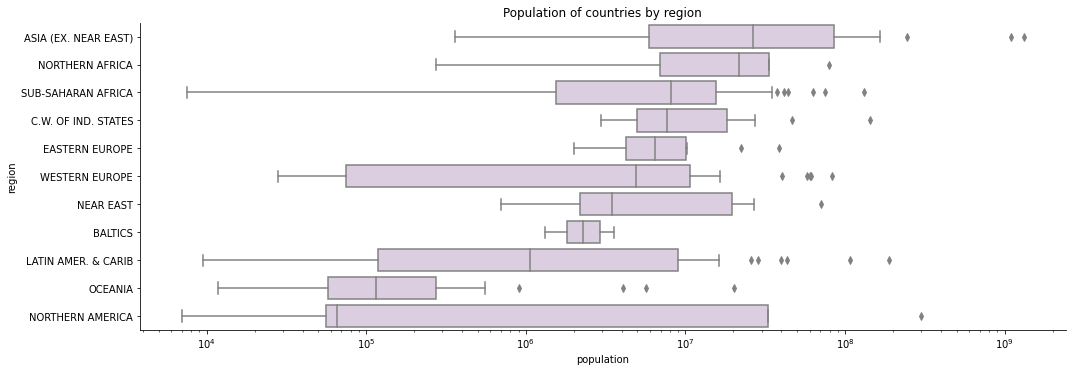

In [ ]:
#Boxplot of population of countries by region
sort_index_viz_2 = dataCountries.groupby("region")["population"].median().sort_values(ascending=False).index
viz_2 = sns.catplot(data=dataCountries,y="region",x="population",kind="box",color="#DECBE4",height=5,aspect=3,order=sort_index_viz_2)
viz_2.set(xscale="log")
plt.title("Population of countries by region")
plt.show()

In [ ]:
#Total population % by region
pop_percent = dataCountries.groupby("region")["population"].sum().sort_values(ascending=False)/(dataCountries.population.sum())
pop_percent = (round(pop_percent,2))*100
pop_percent

region
ASIA (EX. NEAR EAST)    57.0
SUB-SAHARAN AFRICA      11.0
LATIN AMER. & CARIB      9.0
WESTERN EUROPE           6.0
NORTHERN AMERICA         5.0
C.W. OF IND. STATES      4.0
NEAR EAST                3.0
NORTHERN AFRICA          2.0
EASTERN EUROPE           2.0
OCEANIA                  1.0
BALTICS                  0.0
Name: population, dtype: float64

In [ ]:
# Top 5 Countries with the Most Population
data_pop=dataCountries.loc[:,['country','population']]
data_pop.sort_values(by=['population'],inplace=True,ascending=False)
pop_bar=px.bar(data_pop[:5],x='country',y='population',title="Top 5 Countries with the Most Population")
pop_bar.show()

In [ ]:
birthrate = go.Scatter(
    x = dataCountries.index,
    y = dataCountries.birthrate,
    mode = 'lines+markers',
    name = 'Birthrate',
    marker = dict(color = 'rgba(10, 255, 10, 0.5)'),
    text = dataCountries.country)

deathrate = go.Scatter(
    x = dataCountries.index,
    y = dataCountries.deathrate,
    mode = 'lines+markers',
    name = 'Deathrate',
    marker = dict(color = 'rgba(80, 26, 255, 0.8)'),
    text = dataCountries.country)

layout = dict(title = 'Birth and Death Rate of Countries',
             xaxis= dict(zeroline= False)
             )

data = [birthrate, deathrate]
fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
data_infant_morality=dataCountries.loc[:,['country','infant_mortality']]
data_infant_morality.sort_values(by=['infant_mortality'],inplace=True,ascending=False)
inf_mor_bar=px.bar(data_infant_morality[:10],x='country',y='infant_mortality',title="Top 10 Countries with Highest Infant Mortality Rates")
inf_mor_bar.show()

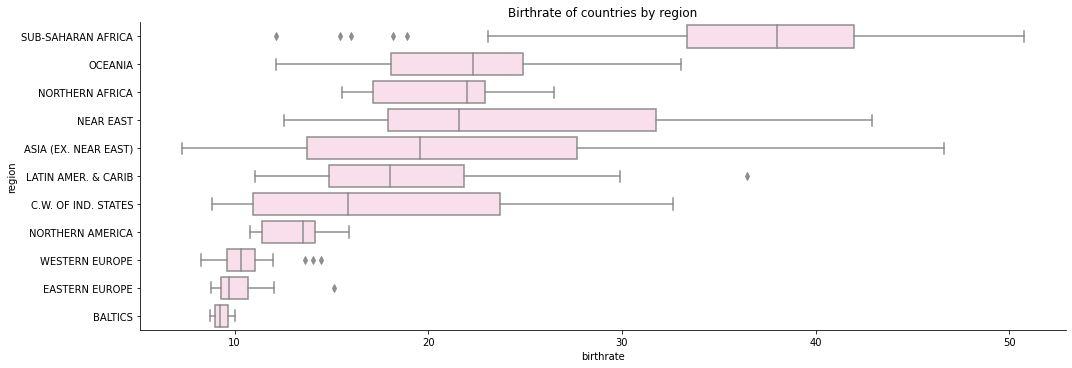

In [ ]:
#Boxplot of Birthrate of countries by region
sort_index_viz_11 = dataCountries.groupby('region')['birthrate'].median().sort_values(ascending=False).index
viz_11 = sns.catplot(data=dataCountries,y="region",x="birthrate",kind="box",color="#FDDAEC",height=5,aspect=3,order=sort_index_viz_11)
plt.title("Birthrate of countries by region")
plt.xlabel("birthrate")
plt.show()

In [ ]:
#Top 5 countries in terms of birthrate
dataCountries[["country","region","birthrate"]].sort_values(by='birthrate',ascending=False).head(5).set_index("country")

,region,birthrate
country,,
Niger,SUB-SAHARAN AFRICA,50.73
Mali,SUB-SAHARAN AFRICA,49.82
Uganda,SUB-SAHARAN AFRICA,47.35
Afghanistan,ASIA (EX. NEAR EAST),46.60
Sierra Leone,SUB-SAHARAN AFRICA,45.76


In [ ]:
#Top 5 countries in terms of infant mortality rate
dataCountries[["country","region","infant_mortality"]].sort_values(by='infant_mortality',ascending=False).head(5).set_index("country")

,region,infant_mortality
country,,
Angola,SUB-SAHARAN AFRICA,191.19
Afghanistan,ASIA (EX. NEAR EAST),163.07
Sierra Leone,SUB-SAHARAN AFRICA,143.64
Mozambique,SUB-SAHARAN AFRICA,130.79
Liberia,SUB-SAHARAN AFRICA,128.87


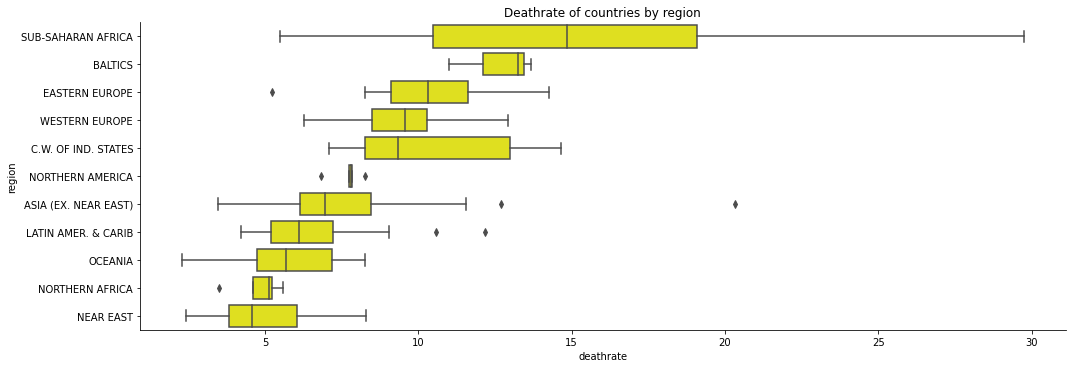

In [ ]:
#Boxplot of Deathrate of countries by region
sort_index_viz_12 = dataCountries.groupby('region')['deathrate'].median().sort_values(ascending=False).index
viz_12 = sns.catplot(data=dataCountries,y="region",x="deathrate",kind="box",color="yellow",height=5,aspect=3,order=sort_index_viz_12)
plt.title("Deathrate of countries by region")
plt.xlabel("deathrate")
plt.show()

In [ ]:
#Top 5 countries in terms of deathrate
dataCountries[["country","region","deathrate"]].sort_values(by='deathrate',ascending=False).head(5).set_index("country")

,region,deathrate
country,,
Swaziland,SUB-SAHARAN AFRICA,29.74
Botswana,SUB-SAHARAN AFRICA,29.50
Lesotho,SUB-SAHARAN AFRICA,28.71
Angola,SUB-SAHARAN AFRICA,24.20
Liberia,SUB-SAHARAN AFRICA,23.10


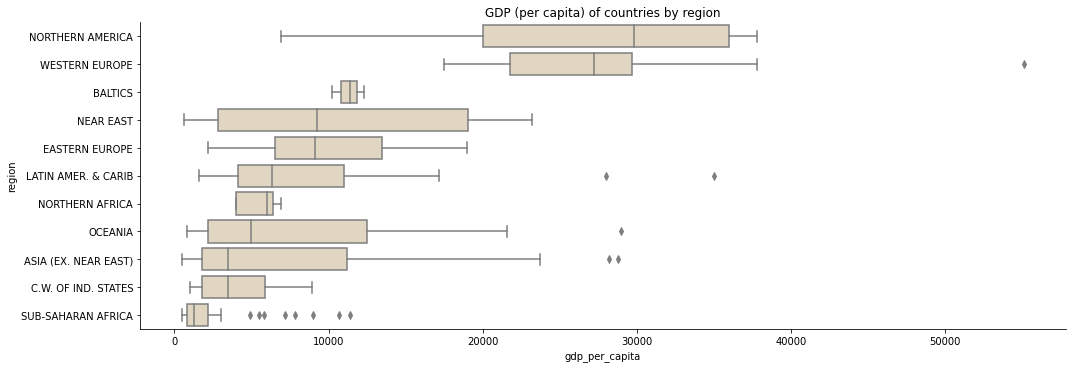

In [ ]:
#Boxplot of GDP per capita of countries by region
sort_index_viz_7 = dataCountries.groupby('region')['gdp_per_capita'].median().sort_values(ascending=False).index
viz_7 = sns.catplot(data=dataCountries,y="region",x="gdp_per_capita",kind="box",color="#E5D8BD",height=5,aspect=3,order=sort_index_viz_7)
plt.title("GDP (per capita) of countries by region")
plt.xlabel("gdp_per_capita")
plt.show()

In [ ]:
# Top 10 countries with higher GDP
data_gdp=dataCountries.loc[:,['country','gdp_per_capita']]
data_gdp.sort_values(by=['gdp_per_capita'],inplace=True,ascending=False)
gdp_bar=px.bar(data_gdp[:10],x='country',y='gdp_per_capita',title="Top 10 countries with higher GDP")
gdp_bar.show()

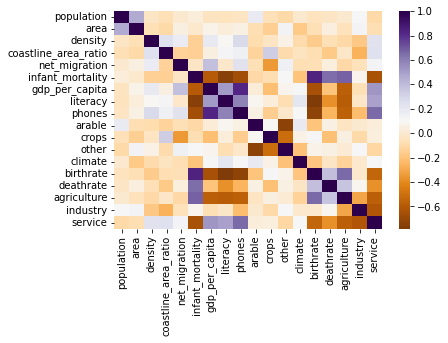

In [ ]:
#Correlation matrix of numeric columns
corr_matrix = dataCountries.corr()
sns.heatmap(corr_matrix,cmap='PuOr')

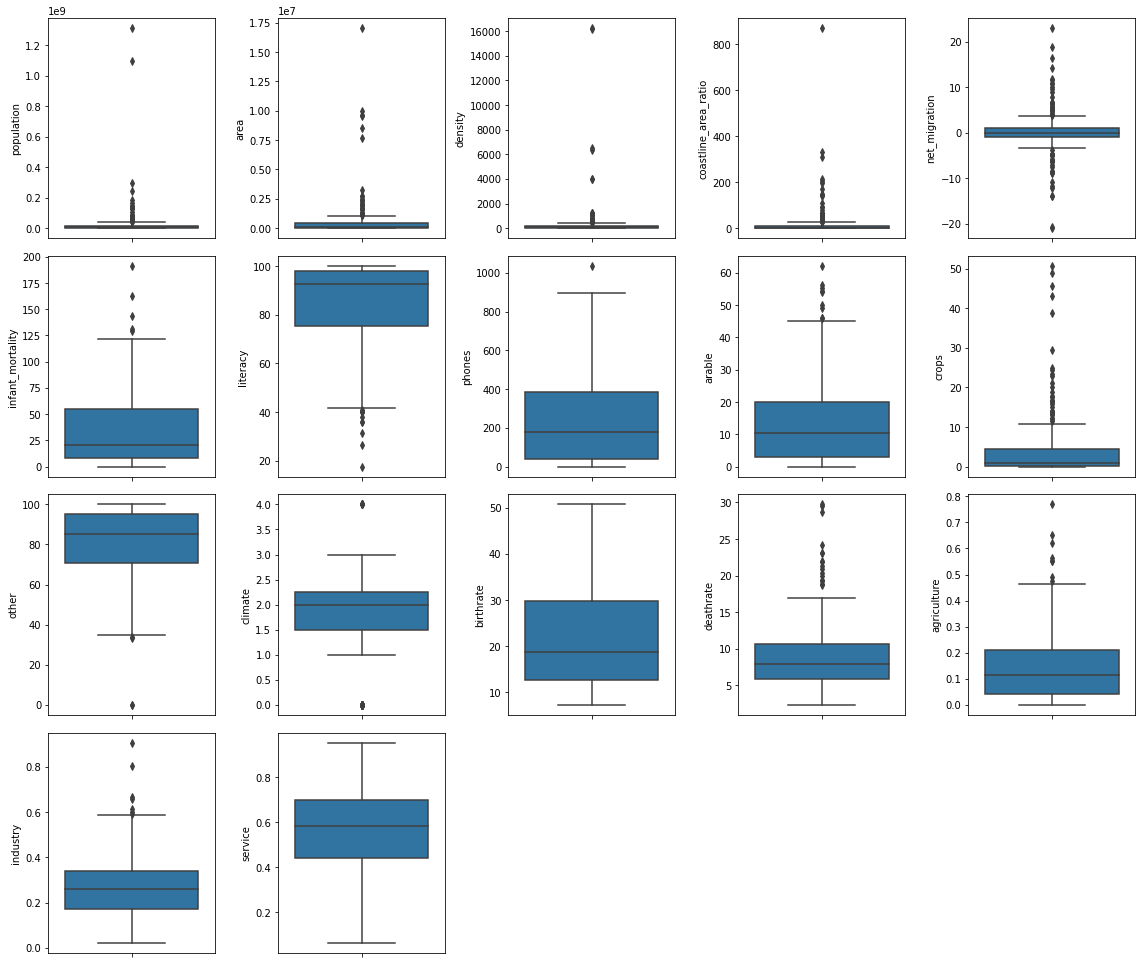

In [ ]:
#Boxplot for distribution analysis of numerical features
fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=dataCountries[features[i]])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

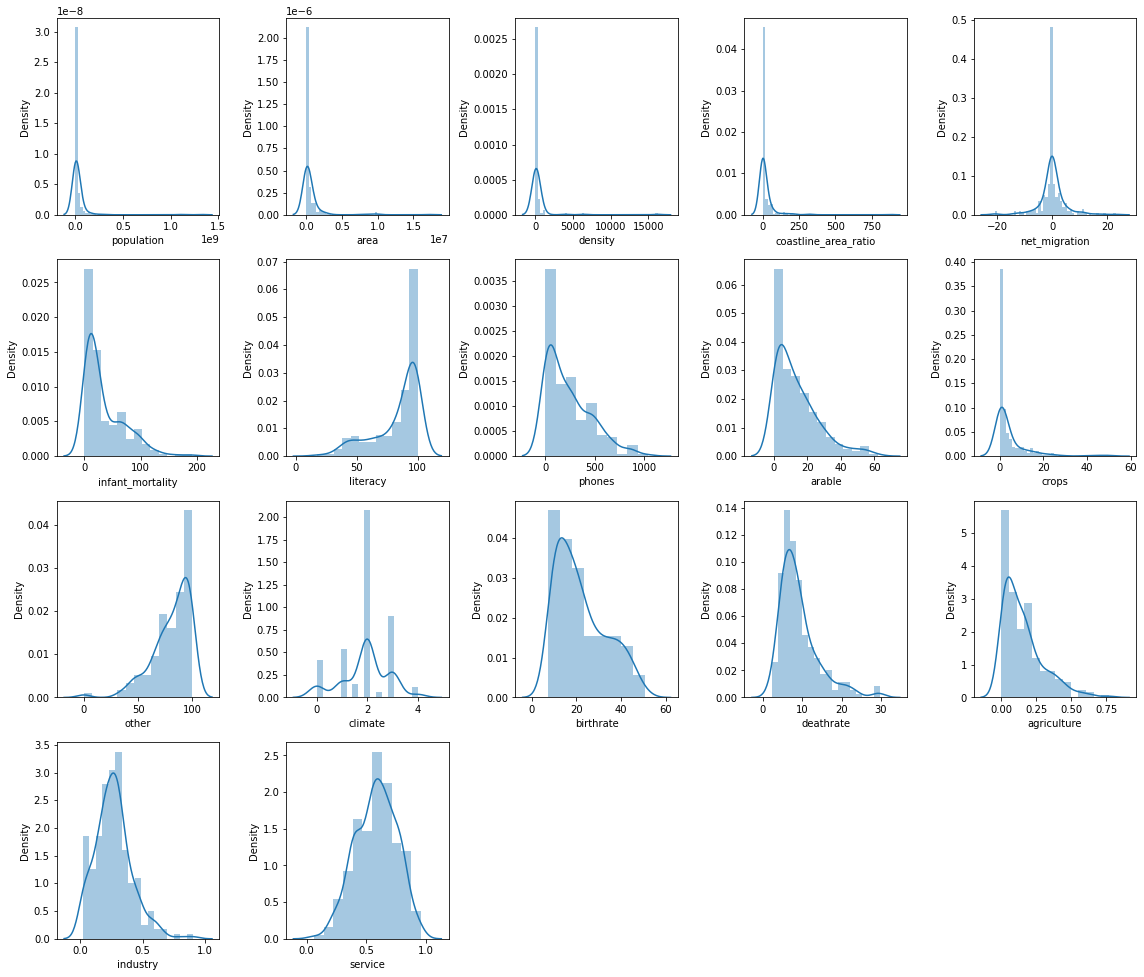

In [ ]:
#Histogram for distribution analysis of numerical features

fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.distplot(dataCountries[features[i]])
plt.tight_layout()
plt.show()

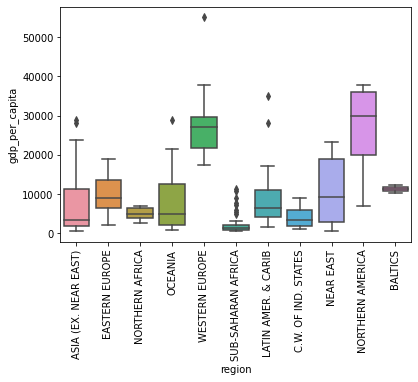

In [ ]:
# boxplot for distribution analysis of region (categorical data) with GDP per Capita

sns.boxplot(y=dataCountries['gdp_per_capita'],x= dataCountries['region'])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



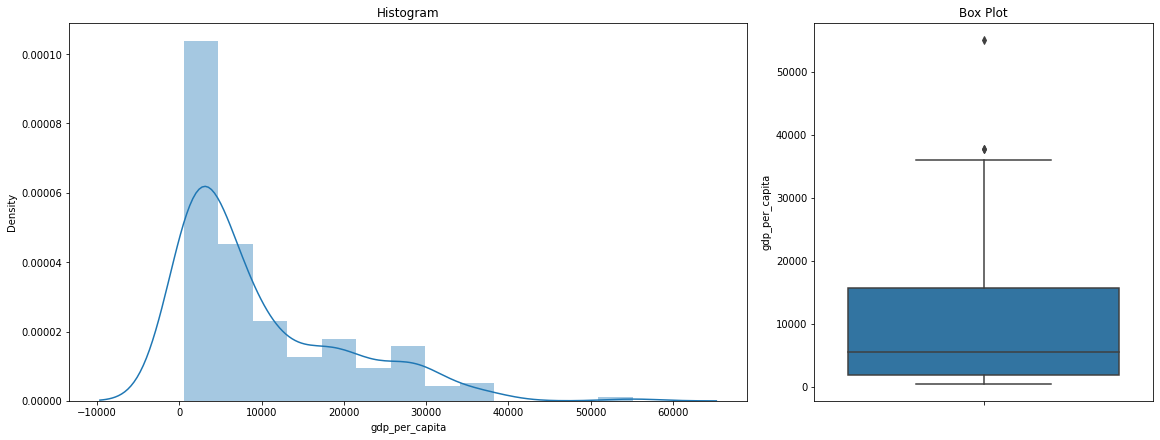

In [ ]:
# Target variable analysis for linear regression analysis
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(dataCountries.loc[:,'gdp_per_capita'], norm_hist=True, ax = ax1)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(y=dataCountries.loc[:,'gdp_per_capita'], orient='v', ax = ax3)
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % dataCountries['gdp_per_capita'].skew())
print("Kurtosis: %f" % dataCountries['gdp_per_capita'].kurt())

Skewness: 1.382162
Kurtosis: 1.571645


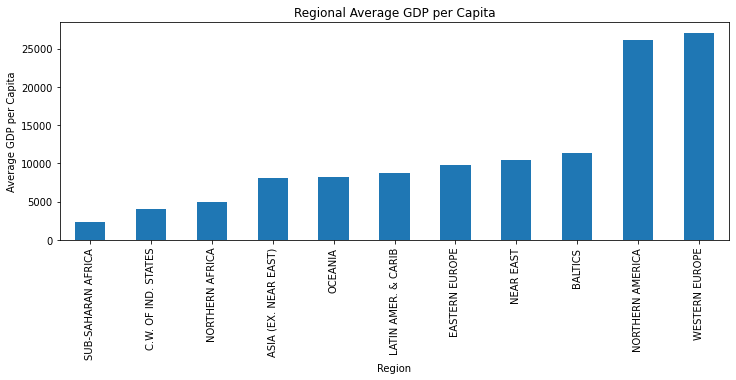

In [ ]:
# GDP analysis
fig = plt.figure(figsize=(12, 4))
dataCountries.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Average GDP per Capita')
plt.show()

Text(0.5, 1.0, 'Regional Average GDP per Capita')

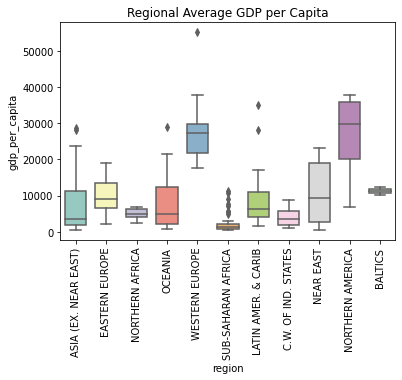

In [ ]:

sns.boxplot(x="region",y="gdp_per_capita",data=dataCountries,width=0.7,palette="Set3",fliersize=5)
plt.xticks(rotation=90)
plt.title("Regional Average GDP per Capita")

<Figure size 864x864 with 0 Axes>

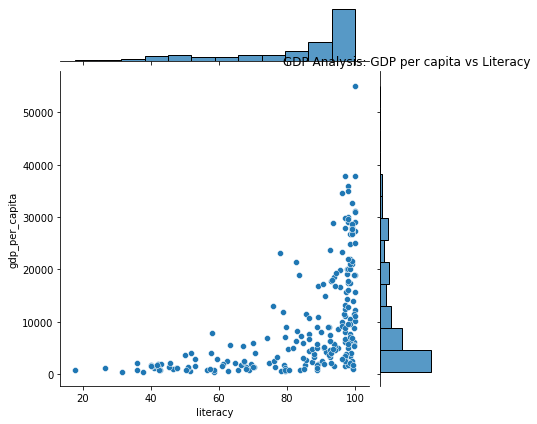

In [ ]:
# GDP per capita VS Literacy
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= dataCountries, x= 'literacy', y= 'gdp_per_capita', kind= 'scatter')
plt.title('GDP Analysis: GDP per capita vs Literacy')
plt.show()

<Figure size 864x864 with 0 Axes>

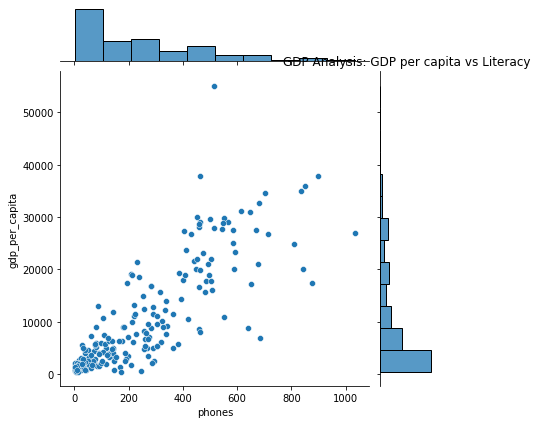

In [ ]:
# GDP per capita VS phones
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= dataCountries, x= 'phones', y= 'gdp_per_capita', kind= 'scatter')
plt.title('GDP Analysis: GDP per capita vs Literacy')
plt.show()

<Figure size 864x864 with 0 Axes>

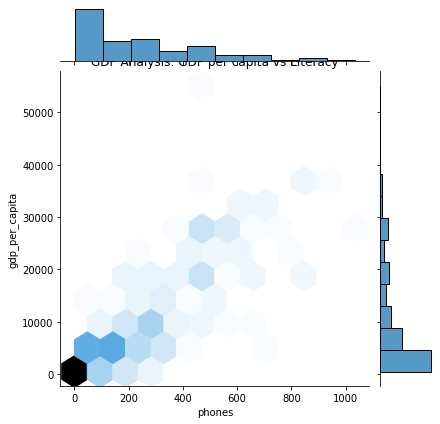

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= dataCountries, x= 'phones', y= 'gdp_per_capita', kind= 'hex')
plt.title('GDP Analysis: GDP per capita vs Literacy')
plt.show()

<Figure size 864x864 with 0 Axes>

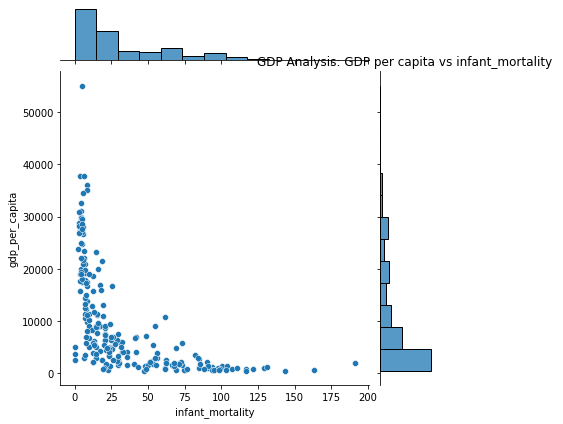

In [ ]:
# GDP per capita VS infant_mortality
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= dataCountries, x= 'infant_mortality', y= 'gdp_per_capita', kind= 'scatter')
plt.title('GDP Analysis: GDP per capita vs infant_mortality ')
plt.show()


<Figure size 864x864 with 0 Axes>

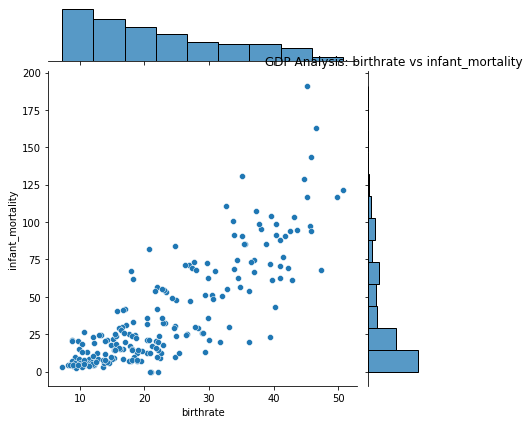

In [ ]:
# birthrate VS infant_mortality
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= dataCountries, x= 'birthrate', y= 'infant_mortality', kind= 'scatter')
plt.title('GDP Analysis: birthrate vs infant_mortality')
plt.show()

In [ ]:
train, test = train_test_split(dataCountries, test_size=0.3, shuffle=True)
training_features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

target = 'gdp_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [ ]:
print(train_X.shape) 
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(158, 17)
(158,)
(69, 17)
(69,)


In [ ]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)

In [ ]:
print('Training Score : ',model1.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_pred_Y,test_Y))

Training Score :  0.7430684903382205
Test score :  0.6834955665193172


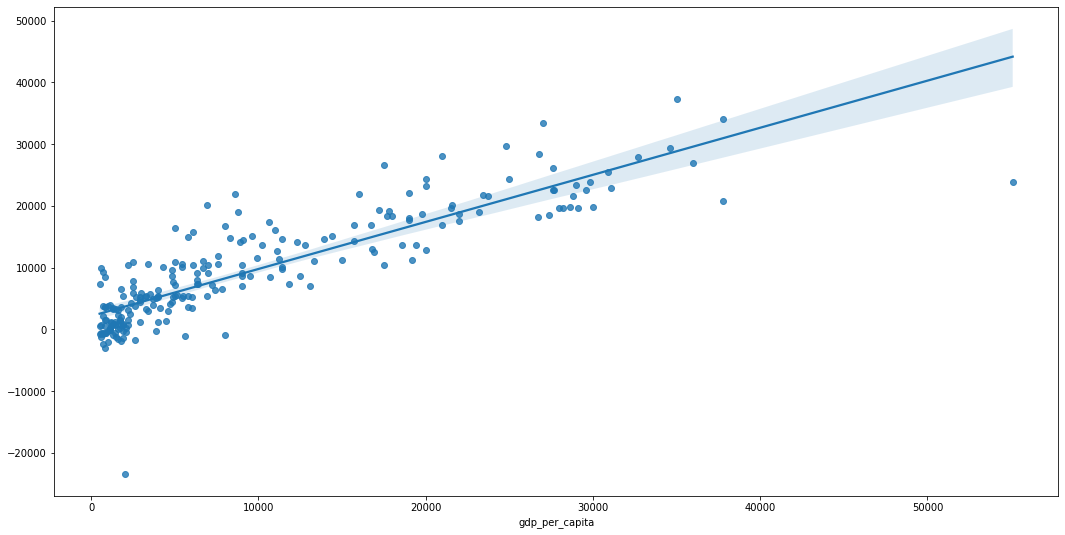

In [ ]:
plt.figure(figsize=(18,9))
whole=model1.predict(dataCountries[training_features])
sns.regplot(x=dataCountries[target],y=whole) 